### Data Loading and Initial Cleanup
We load the dataset containing electronic sales data from September 2023 to September 2024, then perform initial cleaning by filling missing values and handling duplicates. Add-on purchases are also cleaned to ensure no errors in calculations.


In [36]:
# Importing all necessary libararies for analyzing and visualizing the dataset

import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import calendar
import seaborn as sns

In [37]:
# Creating the dataframe variable and reading the data

df = pd.read_csv(r"C:\Users\Dorghaam Haidar\OneDrive\Desktop\DA_Projects\ElectronicStoreSales\Electronic_sales_Sep2023-Sep2024.csv")
df.head()

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56


In [38]:
# FIlling in null values for add ons purchased

df["Add-ons Purchased"] = df["Add-ons Purchased"].fillna(0)
df.head()

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,0,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56


In [39]:
# Replacing in the Add-On Total with 0's so we dont have errors in calculations
# Filling in None for Add-On Purchased for no Null values

df["Add-ons Purchased"] = df["Add-ons Purchased"].replace(0, 'None') 
df["Add-on Total"] = df["Add-on Total"].fillna(0)

In [40]:
# Dropping any duplicates in the table
df_cleaned = df.drop_duplicates()

In [41]:
# Making purchase date proper format to extract month from it to answer these questions
# What was the best month for sales? How much was earned that month?


df_cleaned['Purchase Date'] = pd.to_datetime(df_cleaned['Purchase Date'])
df_cleaned['Month'] = df_cleaned['Purchase Date'].dt.month

In [42]:
df_cleaned.columns

Index(['Customer ID', 'Age', 'Gender', 'Loyalty Member', 'Product Type', 'SKU',
       'Rating', 'Order Status', 'Payment Method', 'Total Price', 'Unit Price',
       'Quantity', 'Purchase Date', 'Shipping Type', 'Add-ons Purchased',
       'Add-on Total', 'Month'],
      dtype='object')

In [43]:
# Renaming total price to only price to make a new column called total price adding on add-on total for real total price

df_cleaned.rename(columns={'Total Price': 'Price'}, inplace=True)
df_cleaned['Total Price'] = df_cleaned['Price'] + df_cleaned['Add-on Total']

In [44]:
# Had to filter out all order status to completed to get the real total price

df_filtered = df_cleaned[df_cleaned['Order Status'] == 'Completed']
df_filtered[['Month', 'Total Price']]

,Month,Total Price
1,4,767.18
2,10,1855.84
3,8,3224.92
4,5,77.06
5,5,148.78
...,...,...
19991,8,5394.56
19994,4,3419.04
19995,6,6838.08
19997,8,2004.88


In [45]:
# Making a year column by slicing the year from purchase date

df_filtered.loc[:, 'Year'] = df_filtered['Purchase Date'].dt.year

C:\Users\Dorghaam Haidar\AppData\Local\Temp\ipykernel_1552\1757617653.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, 'Year'] = df_filtered['Purchase Date'].dt.year


In [49]:
# Making sure there are no cancelled orders when we calculate our highest revenue months 
df_filtered[df_filtered['Order Status'] == 'Cancelled'].shape[0]

0

### Calculating Total Revenue for 2024 and 2023
We calculate and sort the total revenue for each month in both 2024 and 2023. This helps identify which month generated the most revenue. For 2024, January had the highest revenue, while for 2023, October was the best month.


In [50]:
# Sales 2024 calculated highest month and revenue in 2024 which was January 2024 $4609532.76

top_sales_2024 = df_filtered[df_filtered['Year'] == 2024]. groupby('Month')['Total Price'].sum().reset_index()
top_sales_2024_sorted = top_sales_2024.sort_values(by='Total Price', ascending=False)
highest_revenue_month_2024 = top_sales_2024_sorted.head(1)
highest_revenue_month_2024

,Month,Total Price
0,1,4609532.76


In [51]:
# Sales_2023 calculated highest month and revenue in 2024 which was October 2023 $1581479.07
# Pretty close to 2024's highest month, it was for christmas I assume

top_sales_2023 = df_filtered[df_filtered['Year'] == 2023]. groupby('Month')['Total Price'].sum().reset_index()
top_sales_2023_sorted = top_sales_2023.sort_values(by='Total Price', ascending=False)
highest_revenue_month_2023 = top_sales_2023_sorted.head(1)
highest_revenue_month_2023

,Month,Total Price
1,10,1581479.07


In [52]:
# Checking to see why the graph is only 4 bars, data is from 09/2023 - 09/2024 after checking
# Total price grouped with months
monthly_revenue_2023 = df_filtered[df_filtered['Year'] == 2023].groupby('Month')['Total Price'].sum().reset_index()
monthly_revenue_2023


,Month,Total Price
0,9,288973.36
1,10,1581479.07
2,11,1414569.83
3,12,1332773.10


In [53]:
monthly_revenue_2024 = df_filtered[df_filtered['Year'] == 2024].groupby('Month')['Total Price'].sum().reset_index()
monthly_revenue_2024

,Month,Total Price
0,1,4609532.76
1,2,3977503.88
2,3,4310840.58
3,4,4382617.75
4,5,4552289.38
5,6,4550643.31
6,7,4549758.03
7,8,4466294.21
8,9,3447935.55


### Visualization: Total Revenue by Month for 2023 and 2024
We create horizontal bar plots for both 2023 and 2024, showing the total revenue by month. This visualizes the sales trends throughout the year, highlighting peak months for sales.


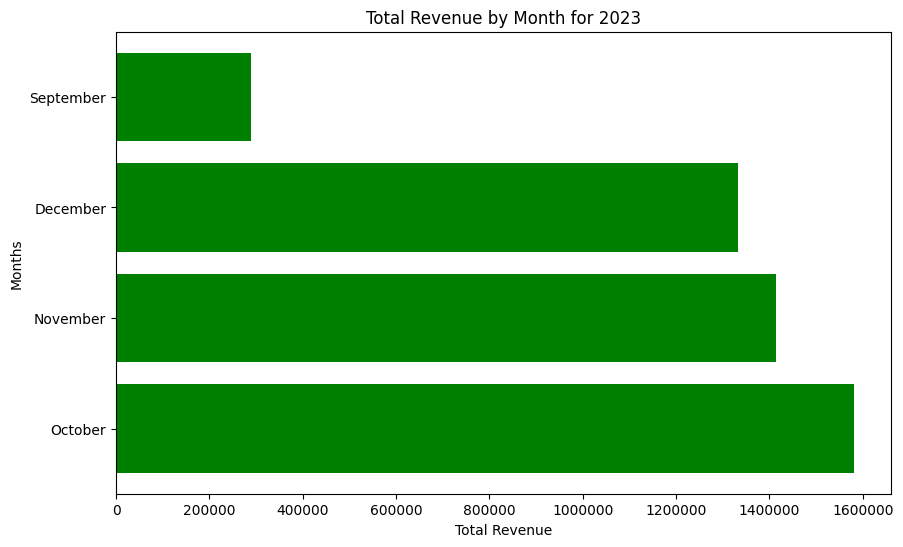

In [54]:
# October was 2023's greatest month
# Using calendar library to match month names with numbers in data

top_sales_2023_sorted['Month'] = top_sales_2023_sorted['Month'].apply(lambda x: calendar.month_name[int(x)])


plt.figure(figsize=(10, 6))
plt.barh(top_sales_2023_sorted['Month'], top_sales_2023_sorted['Total Price'], color='Green')


plt.xlabel('Total Revenue')
plt.ylabel('Months')
plt.title('Total Revenue by Month for 2023')


plt.ticklabel_format(axis='x', style='plain')

plt.show()


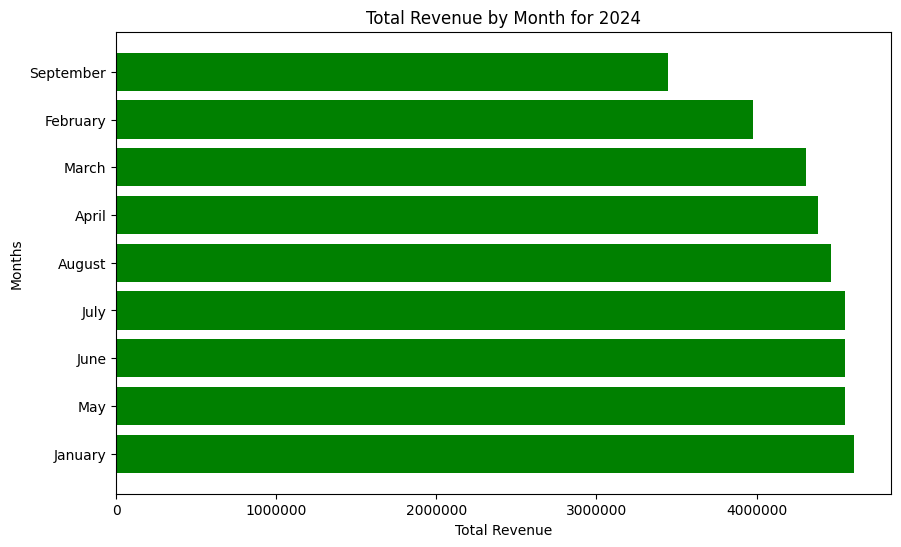

In [55]:
# January was 2024's greatest month

top_sales_2024_sorted['Month'] = top_sales_2024_sorted['Month'].apply(lambda x: calendar.month_name[int(x)])

plt.figure(figsize=(10, 6))
plt.barh(top_sales_2024_sorted['Month'], top_sales_2024_sorted['Total Price'], color='Green')

plt.xlabel('Total Revenue')
plt.ylabel('Months')
plt.title('Total Revenue by Month for 2024')


plt.ticklabel_format(axis='x', style='plain')


plt.show()

### Who Should You Advertise To Based on Age and Gender?
We group the sales data by 'Age Group' and 'Gender' to analyze which demographic contributes the most to total sales. This information is crucial for targeting the right demographic in future advertising efforts.


In [56]:
# Who should you advertise to based on age and gender?
# Which age group and gender contribute most to total sales, and how should advertising efforts be focused?
# Age Ranges

bins = [0, 17, 25, 35, 45, 55, 65, 100]
labels = ['Under 18', '18-25', '26 - 35', '36-45', '46-55', '56-65', '65+']

df_cleaned['Age Group'] = pd.cut(df_cleaned['Age'], bins=bins, labels=labels)

In [57]:
# Grouping the gender with the age groups and summing the total prices to give us
# the info we need to analyze highest paying groups

age_gender_sales = df_cleaned.groupby(['Age Group', 'Gender'])['Total Price'].sum().reset_index()
age_gender_sales


C:\Users\Dorghaam Haidar\AppData\Local\Temp\ipykernel_1552\1708106660.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender_sales = df_cleaned.groupby(['Age Group', 'Gender'])['Total Price'].sum().reset_index()


,Age Group,Gender,Total Price
0,Under 18,Female,0.00
1,Under 18,Male,0.00
2,18-25,Female,4116841.39
3,18-25,Male,3861633.56
4,26 - 35,Female,4999076.05
5,26 - 35,Male,5222713.42
6,36-45,Female,5457940.96
7,36-45,Male,5252920.41
8,46-55,Female,4893767.99
9,46-55,Male,5280628.70


In [58]:
# Highest paying group is 65+ Males with a revenue of $7759471.42

age_gender_sales_sorted = age_gender_sales.sort_values(by='Total Price', ascending=False)
age_gender_sales_sorted

,Age Group,Gender,Total Price
13,65+,Male,7759471.42
12,65+,Female,7475555.51
6,36-45,Female,5457940.96
11,56-65,Male,5430704.21
9,46-55,Male,5280628.70
7,36-45,Male,5252920.41
5,26 - 35,Male,5222713.42
10,56-65,Female,5095637.39
4,26 - 35,Female,4999076.05
8,46-55,Female,4893767.99


### Visualization: Total Revenue by Age Group and Gender
A bar plot is created to visually compare total revenue for different age groups and genders. The analysis shows that the highest paying group is 65+ males, followed by 65+ females, making the elderly demographic the most valuable target for advertising.


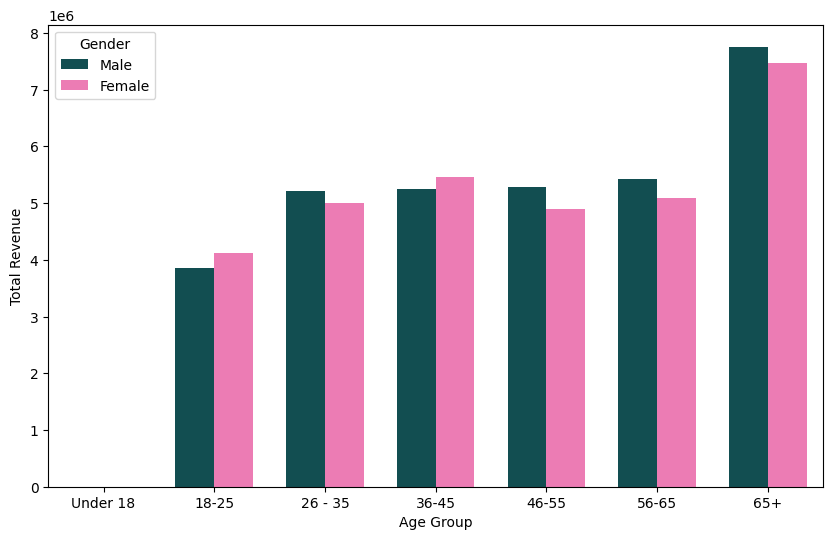

In [26]:
# Relative to all the other groups, age 65+ has most revenue for Male & Female

plt.figure(figsize=(10,6))
custom_colors = ['#07575b', '#FF69B4']

sns.barplot(x='Age Group', y='Total Price', hue='Gender', data=age_gender_sales_sorted, 
            palette=custom_colors, width=0.7)
plt.xlabel('Age Group')
plt.ylabel('Total Revenue')
plt.show()


### Product Preferences Among the Elderly (65+)
We analyze the purchasing habits of the elderly demographic (65+), finding that smartphones are the most purchased product, with a total sales figure of $5,091,938.24. 


In [59]:
# What type of product has been purchased most by this demographic?

# Filtering for Age Group of over 65
# Smartphones have the highest sales with Total Sales of $5091938.24

elderly_data = df_cleaned[df_cleaned['Age Group'] == '65+']
product_sales_elderly = elderly_data.groupby("Product Type")['Total Price'].sum().reset_index()
product_sales_elderly_sorted = product_sales_elderly.sort_values(by = 'Total Price', ascending = False)
product_sales_elderly_sorted

,Product Type,Total Price
2,Smartphone,5091938.24
3,Smartwatch,3453795.43
4,Tablet,2896221.70
1,Laptop,2857278.06
0,Headphones,935793.50


### Visualization: Product Sales Distribution Among the Elderly
A pie chart is created to show the sales distribution for various product types among elderly customers (65+). Smartphones account for the largest share of total sales.


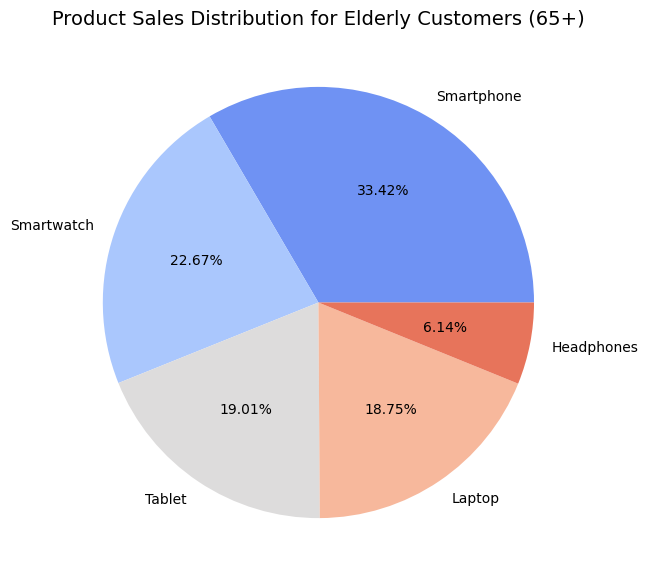

In [60]:
# Pie chart showing sales percentage out of 100% for each product

plt.figure(figsize=(7, 7))
plt.pie(product_sales_elderly_sorted['Total Price'], labels=product_sales_elderly_sorted['Product Type'],  autopct='%1.2f%%', \
        colors=sns.color_palette('coolwarm', len(product_sales_elderly_sorted)))

plt.title('Product Sales Distribution for Elderly Customers (65+)', fontsize=14)
plt.show()

### Do Loyalty Members Spend More on Average Than Non-Members?
We analyze the spending habits of loyalty members compared to non-members. Surprisingly, loyalty members spend less on average. This section explores whether loyalty members prefer lower-cost products, explaining the lower total sales.


In [61]:
# Do loyalty members spend more on average than non members?
# Loyalty Members spend less than Non-Loyalty members

loyalty_sales = df_filtered.groupby('Loyalty Member')['Total Price'].mean().reset_index()
loyalty_sales

,Loyalty Member,Total Price
0,No,3251.854545
1,Yes,3178.669805


In [62]:
# We will group by product to see if loyalty members prefer lower cost products to explain
# the lower sales

loyalty_sales_products = df_filtered.groupby(['Loyalty Member', 'Product Type'])['Total Price'].sum().reset_index()
loyalty_sales_products_sorted = loyalty_sales_products.sort_values(by = 'Total Price', ascending = False) 
loyalty_sales_products_sorted

,Loyalty Member,Product Type,Total Price
2,No,Smartphone,11607423.64
3,No,Smartwatch,7598573.95
1,No,Laptop,6699459.73
4,No,Tablet,6113462.29
7,Yes,Smartphone,3022901.89
0,No,Headphones,2164575.37
8,Yes,Smartwatch,1958842.07
6,Yes,Laptop,1837123.30
9,Yes,Tablet,1779969.22
5,Yes,Headphones,682879.35


### Visualization: Total Sales by Product Type for Loyalty Members vs Non-Members
This bar plot compares total sales by product type for loyalty members and non-members. The analysis reveals that non-members dominate in every product category, especially in high end products like smartphones.


Text(0, 0.5, 'Total Sales (Total Price)')

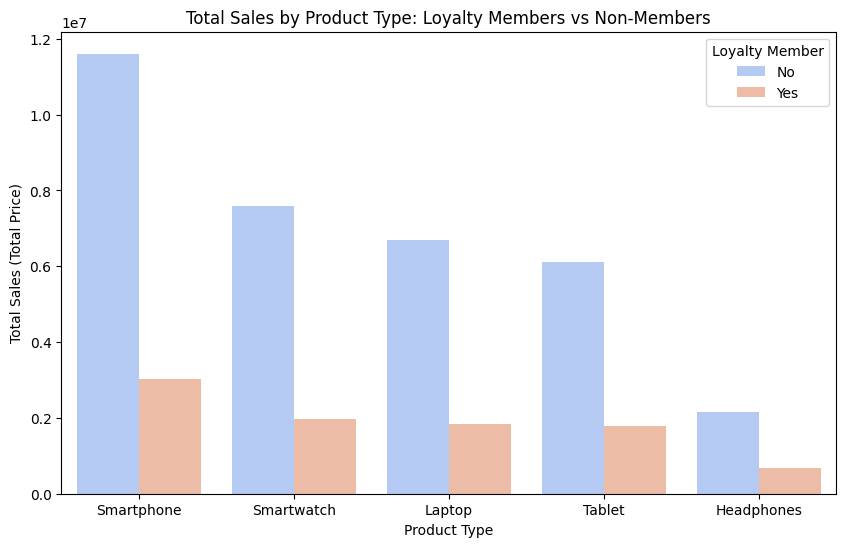

In [63]:
# Non loyalty members dominate in ever product with smartphones being the greatest

plt.figure(figsize = (10,6))
sns.barplot(x = 'Product Type', y = 'Total Price', hue = 'Loyalty Member', data = loyalty_sales_products_sorted, palette = 'coolwarm')

plt.title('Total Sales by Product Type: Loyalty Members vs Non-Members')
plt.xlabel('Product Type')
plt.ylabel('Total Sales (Total Price)')